# Imports

In [70]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()

In [71]:
 !ls stacking

 2019-03-20_15_43_sub.csv		   lgb_submission.csv
 answer_9_lb_aug.csv			  'submission(1).csv'
 blended_submission_2019-03-28_18_55.csv  'submission26(1).csv'
 blend_submission.csv			   submission26.csv
 lgb_all_predictions.csv		   submission.csv


In [72]:
files = !ls stacking

In [73]:
files

['2019-03-20_15_43_sub.csv',
 'answer_9_lb_aug.csv',
 'blended_submission_2019-03-28_18_55.csv',
 'blend_submission.csv',
 'lgb_all_predictions.csv',
 'lgb_submission.csv',
 'submission(1).csv',
 'submission26(1).csv',
 'submission26.csv',
 'submission.csv']

In [74]:
allpreds = {}
for i, file in enumerate(files):
    file = "stacking/" + str(file)
    try:
        preds = pd.read_csv(file)['target']
    except:
        continue
    key = str(i)   
    allpreds[key] = preds    
allpreds = pd.DataFrame(allpreds)   

In [75]:
allpreds.head()

,0,1,2,3,4,5,6,7,8,9
0,0.139434,0.146873,0.140047,0.102437,0.133169,0.133301,0.140350,0.146834,0.154476,0.142333
1,0.270568,0.270749,0.279192,0.206648,0.288001,0.285851,0.266149,0.278958,0.273420,0.274733
2,0.235634,0.239110,0.242841,0.167192,0.252864,0.244272,0.242502,0.228228,0.238857,0.241985
3,0.296368,0.288975,0.286216,0.205183,0.279868,0.281002,0.290483,0.292070,0.284103,0.291388
4,0.060134,0.059446,0.061384,0.042240,0.064258,0.062636,0.056952,0.061501,0.060736,0.058313


In [76]:
allpreds.mean(axis = 1)

0         0.137925
1         0.269427
2         0.233348
3         0.279566
4         0.058760
5         0.002537
6         0.007427
7         0.243585
8         0.003143
9         0.010381
10        0.341042
11        0.044943
12        0.062587
13        0.033086
14        0.009009
15        0.046172
16        0.421689
17        0.036613
18        0.256278
19        0.014593
20        0.444112
21        0.097228
22        0.010701
23        0.050595
24        0.013396
25        0.138480
26        0.136377
27        0.021491
28        0.384064
29        0.111817
            ...   
199970    0.076652
199971    0.182660
199972    0.005993
199973    0.075813
199974    0.006797
199975    0.113577
199976    0.316622
199977    0.262192
199978    0.042230
199979    0.120457
199980    0.091555
199981    0.058587
199982    0.035568
199983    0.045581
199984    0.018512
199985    0.209006
199986    0.594921
199987    0.067173
199988    0.017739
199989    0.045534
199990    0.006815
199991    0.

In [79]:
answercsv['target'] = allpreds.mean(axis = 1)
answercsv.head()

,ID_code,target
0,test_0,0.137925
1,test_1,0.269427
2,test_2,0.233348
3,test_3,0.279566
4,test_4,0.058760


In [80]:
answercsv.to_csv('answer_18_blend_average.csv', index=False)

# Correlation

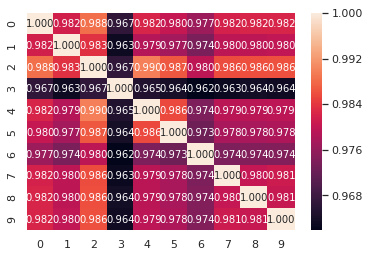

In [23]:
kendall = allpreds.corr(method = 'kendall')
sns.heatmap(kendall, annot = True, fmt = ".3f")

In [97]:
mmap = {
    0:5,
    1:5,
    2:6,
    3:6,
    4:7,
    5:7,
    6:8,
    7:8,
    8:9,
    9:9,
}

In [101]:
cr = kendall.sum(axis = 1)
for x, y in zip((10/cr ), cr):
    print(f"{x} | {y}")
weights = np.argsort(cr)
print(weights)
weights = weights.map(mmap)

1.0180421733479739 | 9.822775776678881
1.0206553541053132 | 9.79762655413277
1.014941106322251 | 9.8527884403422
1.0332252389415806 | 9.678431791158955
1.018948004783735 | 9.814043457617286
1.0203808140698418 | 9.80026266871334
1.0244353026762039 | 9.76147539417697
1.0201336842241764 | 9.802636805984028
1.01995995423486 | 9.804306491132454
1.0198191121972795 | 9.805660514102568
0    3
1    6
2    1
3    5
4    7
5    8
6    9
7    4
8    0
9    2
dtype: int64


In [109]:
weights

0    6
1    8
2    5
3    7
4    8
5    9
6    9
7    7
8    5
9    6
dtype: int64

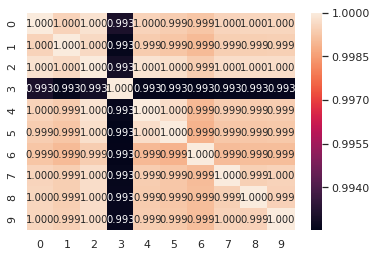

In [25]:
pearson = allpreds.corr(method = 'pearson')
sns.heatmap(pearson, annot = True, fmt = ".3f")

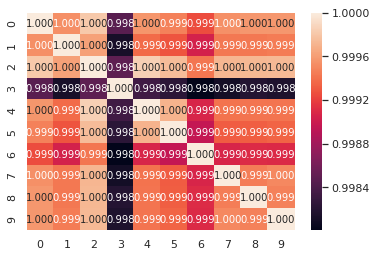

In [27]:
spearman = allpreds.corr(method = 'spearman')
sns.heatmap(spearman, annot = True, fmt = ".3f")


# Make weighted prediction

In [102]:
print(allpreds.shape)
print(weights.shape)
allpreds.head()

(200000, 10)
(10,)


,0,1,2,3,4,5,6,7,8,9
0,0.139434,0.146873,0.140047,0.102437,0.133169,0.133301,0.140350,0.146834,0.154476,0.142333
1,0.270568,0.270749,0.279192,0.206648,0.288001,0.285851,0.266149,0.278958,0.273420,0.274733
2,0.235634,0.239110,0.242841,0.167192,0.252864,0.244272,0.242502,0.228228,0.238857,0.241985
3,0.296368,0.288975,0.286216,0.205183,0.279868,0.281002,0.290483,0.292070,0.284103,0.291388
4,0.060134,0.059446,0.061384,0.042240,0.064258,0.062636,0.056952,0.061501,0.060736,0.058313


In [103]:
new_preds = allpreds.copy()
for column in new_preds.columns:
    new_preds[column] *= weights[column]

In [104]:
answer = new_preds.sum(axis=1)/weights.sum()

In [105]:
answercsv = pd.read_csv('stacking/submission.csv')
answercsv.head()

,ID_code,target
0,test_0,0.142333
1,test_1,0.274733
2,test_2,0.241985
3,test_3,0.291388
4,test_4,0.058313


In [106]:
answercsv['target'] = answer
answercsv.head()

,ID_code,target
0,test_0,0.137304
1,test_1,0.269602
2,test_2,0.233699
3,test_3,0.279329
4,test_4,0.058763


In [107]:
!ls *csv

answer_10_gpu_lgbm.csv
answer_11_gpu_lgbm_and_pred_best.csv
answer_12_lgbm_bin_trainednotonval.csv
answer_13_lgbm_bin_trainednotonval.csv
answer_14_my_scores_blended.csv
answer_15_probability_no_aug.csv
answer_16_probability_lolThiswontWork.csv
answer_17_kendall_correlation_inverse_weighted_blend.csv
answer_18_blend_average.csv
answer_1_simple_gbm.csv
answer_2_lgbm_with_CV10.csv
answer_3_lgbm_with_augmented_data_smote_and_shiz.csv
answer_4_lgbm_with_augmented_data_smote_and_shiz_and_super_learner.csv
answer_5_lgbm_with_only_random_augmented_data.csv
answer_6_lgbm_with_best_and_random_averaged.csv
answer_7_lgbm_ORbwRandomAndBest.csv
answer_8_lgbm_AveragedORbwRandomAndBest.csv
answer_9_lb_aug.csv
init3.csv
paugTest.csv
paugTrain.csv
test_augmented.csv
train_augmented.csv


In [108]:
answercsv.to_csv('answer_19_kendall_correlation_inverse_weighted_blend_with_larger_difference.csv', index=False)